# Natural Language Processing for Stocks News Analysis & Twitter Sentiment Analysis


## Project Overview

Financial institutions increasingly rely on unstructured text data—news articles, analyst reports, social media posts, earnings call transcripts, and blogs—to enhance investment decisions.

Unlike structured data (tables and numbers), text requires specialized preprocessing before it becomes usable for analytics or machine learning.

In this project, we build a Natural Language Processing (NLP) pipeline and train a deep learning model (LSTM) to analyze sentiment from stock-related Twitter posts and news headlines.

This sentiment can be used as an additional quantitative signal in trading or investment decision frameworks.

**Project Workflow:**

1. Conceptualization of the Modeling Task

2. Data Collection & Exploratory Data Analysis (EDA)

3. Data Preparation & Wrangling

4. Data Exploration & Visualization

5. Model Training & Evaluation

## Introduction:

Organizations today generate enormous volumes of data, often in unstructured formats, such as:

• Social media posts (tweets, blogs, threads)

• News articles

• Email and internal communications

• Web activity logs

• Electronic images and documents

These forms of data cannot be directly analyzed without transformation. NLP bridges this gap, converting text into numerical representations that machine learning models can understand.

In this project, we will:

• Clean and preprocess raw Twitter/news text

• Convert text into numerical sequences

• Build and train an LSTM network for sentiment classification

• Evaluate performance and interpret model results

## 1. Conceptualization of the Modeling Task

Before building any ML system, we must define:

• What problem are we solving?

• What form should the model’s output take?

• How will the model be used, and by whom?

• Will it integrate into an existing workflow or decision process?

We aim to build a machine learning model capable of analyzing thousands of tweets and news headlines to classify sentiment toward a specific stock or company.

Sentiment analysis can serve as an additional factor model input, supporting:

• Buy/sell decisions

• Short-term price movement forecasting

• Volatility signals

• Market sentiment monitoring

Modeling Approach

We will train a Long Short-Term Memory (LSTM) neural network — ideal for sequence-based data such as text.

## 2. Data Collection & Exploratory Data Analysis

### Importing Required Python Libraries

We will install and use:

•	WordCloud to create visualizations of frequently used terms

•	NLTK (Natural Language Toolkit) fo tokenization, stopword removal, text normalization

•	Gensim for topic modeling and advanced NLP utilities


In [1]:
pip install wordcloud gensim nltk

  Using cached nltk-3.9.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached smart_open-7.5.0-py3-none-any.whl.metadata (24 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.4/24.4 MB 12.6 MB/s  0:00:012.6 MB/s eta 0:00:01:01
Using cached nltk-3.9.2-py3-none-any.whl (1.5 MB)
Using cached smart_open-7.5.0-py3-none-any.whl (63 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [wordcloud]━━━━━━━━ 5/7 [gensim]
Note: you may need to restart the kernel to use updated packages.


In [9]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

### Loading the Dataset

We will work with a dataset of:

•	Twitter posts mentioning specific stocks or companies

•	Financial news headlines

In [10]:
# load the stock news data
stock_df = pd.read_csv('Stock_sentiment.csv')
stock_df.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [11]:
# dataframe information
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


- The dataset contains 5,791 rows, meaning there are 5,791 tweets/news texts available for sentiment analysis.

- Text is The actual tweet or message related to a stock. The text that will be cleaned, tokenized, and converted to sequences.

- Sentiment label (0 or 1): Most likely 1 = positive, 0 = negative.

In [12]:
# check for null values
stock_df.isnull()

,Text,Sentiment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5786,False,False
5787,False,False
5788,False,False
5789,False,False


The dataset contains 5,791 labeled stock-related text entries, each consisting of a tweet/news text and a corresponding sentiment label. No missing values were detected in either the Text or Sentiment columns, indicating that the dataset is clean and ready for preprocessing. This ensures we can proceed directly to text cleaning, tokenization, and model preparation without needing imputation or row removal.

### Sentiment distribution

In [13]:
# Find the number of unique values in a particular column
stock_df['Sentiment'].nunique()

2

The Sentiment column contains 2 unique classes which confirms that the dataset is a binary classification problem.
- 0 for Negative sentiment
- 1 for Positive sentiment

### Countplot of Sentiment

Seaborn countplot help us to find the frequency of each sentiment class

/var/folders/c4/xntd0yb16dz1d4dv_zrhdtvc0000gn/T/ipykernel_64957/3246075306.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=stock_df, x='Sentiment', palette='viridis')


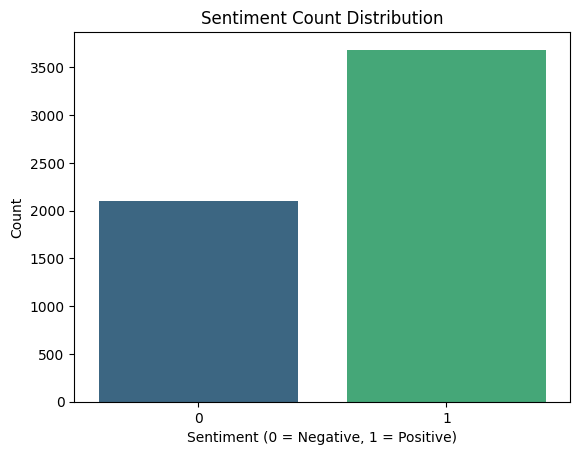

In [16]:
sns.countplot(data=stock_df, x='Sentiment', palette='viridis')
plt.title("Sentiment Count Distribution")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.show()

The sentiment variable contains two unique classes, confirming a binary sentiment-classification task. 

A visualization of class frequencies shows an imbalance, with positive tweets significantly outnumbering negative ones. 

- Positive (1) = 3,700 entries

- Negative (0) = 2,100 entries

This imbalance should be addressed during model training to prevent biased predictions.

If we train an LSTM model on this dataset without handling imbalance, the model might learn to favor predicting the majority class (positive sentiments).

## 3. Data Preparation & Wrangling:

#### Removing Punctuations

We are going to create a for loop that goes through every single character in each text for the entire 5791 tweets in order to get rid of every punctuation in the text.

In [17]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
# define a function to remove punctuations
def remove_punc(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    return Test_punc_removed_join

In [20]:
# remove punctuations from our dataset
stock_df['Text Without Punctuation'] = stock_df['Text'].apply(remove_punc)
stock_df.head()

,Text,Sentiment,Text Without Punctuation
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...
3,MNTA Over 12.00,1,MNTA Over 1200
4,OI Over 21.37,1,OI Over 2137


In [21]:
stock_df['Text'][2]

"user I'd be afraid to short AMZN - they are looking like a near-monopoly in eBooks and infrastructure-as-a-service"

In [22]:
stock_df['Text Without Punctuation'][2]

'user Id be afraid to short AMZN  they are looking like a nearmonopoly in eBooks and infrastructureasaservice'

We’ve created a cleaner text column without punctuation, which is better for tokenization and later modeling.

### Stopwords

In this stage of preprocessing, our goal is to remove stopwords that do not contribute meaningful information for the sentiment model. 

Stopwords include very common English words like “the,” “and,” “we,” “you,” as well as domain-specific filler terms that appear often in financial text but carry little semantic value.

1. Standard English Stopwords: We first load the default English stopword list from NLTK. These stopwords do not help a model understand sentiment, because they are not tied to positive or negative meaning.


2. Extending the Stopword List (Domain-Specific Noise): 
- Stock-market text often includes additional tokens that are URLs, email-style fragments, generic communication words or filler characters.
- To handle this, we extend our stopword list with domain-specific noise terms.These terms appear frequently in datasets collected from news, emails, and social media, but they do not help in predicting investor sentiment. Removing them improves model focus on meaningful words like “gain,” “drop,” “profit,” “fraud,” “bullish,” etc.

So, we are building a custom stopword list that removes both generic English stopwords and finance/email-style filler words, which should improve our sentiment model.


In [26]:
# download stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zakariyaboutayeb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
# Obtain additional stopwords from nltk
stop_words.extend(['https','from','subject','re','edu','use','will', ...])

### Custom Preprocessing Function

Define a preprocessing function that:

•	Tokenizes text using gensim.simple_preprocess

•	Removes stopwords

•	Removes short tokens (length < 3)

•	Returns only meaningful tokens

In [47]:
# Obtain the total words present in the dataset
list_of_words = []

for i in stock_df['Text Without Punc & Stopwords']:
    for j in i:
        list_of_words.append(j)

In [48]:
list_of_words

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts',
 'user',
 'aap',
 'movie',
 'return',
 'feageed',
 'indicator',
 'trades',
 'year',
 'awesome',
 'user',
 'afraid',
 'short',
 'amzn',
 'looking',
 'like',
 'nearmonopoly',
 'ebooks',
 'mnta',
 'pgnx',
 'aap',
 'user',
 'current',
 'downtrend',
 'break',
 'otherwise',
 'shortterm',
 'correction',
 'medterm',
 'downtrend',
 'mondays',
 'relative',
 'weakness',
 'nyx',
 'win',
 'tie',
 'tap',
 'ice',
 'int',
 'bmc',
 'aon',
 'chk',
 'biib',
 'goog',
 'ower',
 'trend',
 'line',
 'channel',
 'test',
 'volume',
 'support',
 'aap',
 'watch',
 'tomorrow',
 'ong',
 'entry',
 'assuming',
 'fcx',
 'opens',
 'tomorrow',
 'trigger',
 'buy',
 'still',
 'much',
 'like',
 'setup',
 'really',
 'worries',
 'everyone',
 'expects',
 'market',
 'rally',
 'nowusually',
 'exact',
 'opposite',
 'happens',
 'every',
 'time',
 'shall',
 'see',
 'soon',
 'bac',
 'spx',
 'jpm',
 '

In [28]:
# Remove stopwords and short words less than 2 characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 3 and token not in stop_words:
            result.append(token)
    return result

In [49]:
# Obtain the total number of unique words
total_words = len(list(set(list_of_words)))
total_words

9275

In [30]:
# apply pre-processing to the text column
stock_df['Text Without Punc & Stopwords'] = stock_df['Text Without Punctuation'].apply(preprocess)
stock_df['Text'][0]

'Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method 1 or method 2, see prev posts'

In [31]:
stock_df['Text Without Punc & Stopwords'][0]

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts']

**Interpretation:**

After removing punctuation, stopwords and short words, words like “on”, “my”, “or”, “1”, “2” are removed because they add no sentiment value. However, ticker symbols (e.g., XIDE, TIT, BPZ) remain because certain tickers may appear more often in negative or positive tweets.

- Words are now lowercased, clean, and ready for tokenization.

- Tokens shorter than 3 characters were removed which is helpful for reducing noise.

- Duplicates remain (e.g., “method” appears twice) which is a correct behavior, as frequency impacts NLP models.

This preprocessing ensures that the model focuses on words that actually reflect investor sentiment.

In [32]:
stock_df.head()

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[user, aap, movie, return, feageed, indicator,..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[user, afraid, short, amzn, looking, like, nea..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta]
4,OI Over 21.37,1,OI Over 2137,[]


Joining the cleaned tokens into a clean text so the deep learning model can receive full processed sentences.

This creates a new column called "Text Without Punc & Stopwords Joined".

## 4. Word Clouds

### Plot Word Cloud

A word cloud is a visual representation of all the words in a BOW (Bag of Words) such that words with higher frequency have a larger font size. The most commonly occuring words in the dataset can be shown by varying font size, and color is used to add more dimensions, such as frequency and length of words. This allows the analyst to determine which words are contextually more important.

In [33]:
# join the words into a string
stock_df['Text Without Punc & Stopwords Joined'] = stock_df['Text Without Punc & Stopwords'].apply(lambda x: " ".join(x))

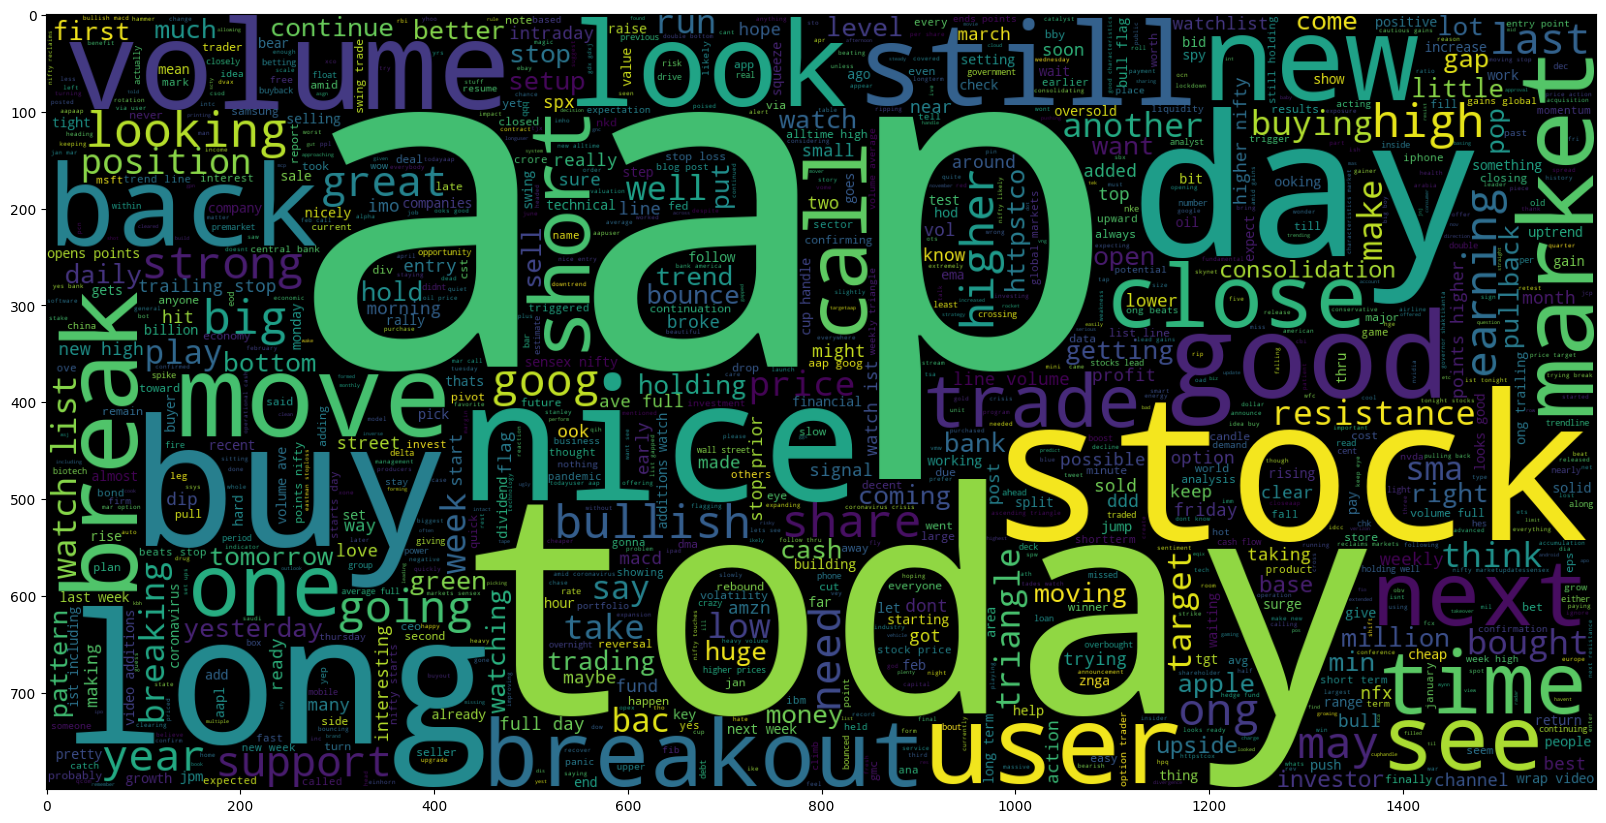

In [34]:
# plot the word cloud for text with positive sentiment
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 1000, width = 1600, height = 800).generate("".join(stock_df[stock_df['Sentiment']==1]['Text Without Punc & Stopwords Joined']))
plt.imshow(wc)

**Positive Sentiment Word Cloud:**

Words like “buy”, “long”, “next”, “breakout”, “volume”, “support” and “bullish” appear prominently. They strongly correlate with bullish or optimistic sentiment in trading.

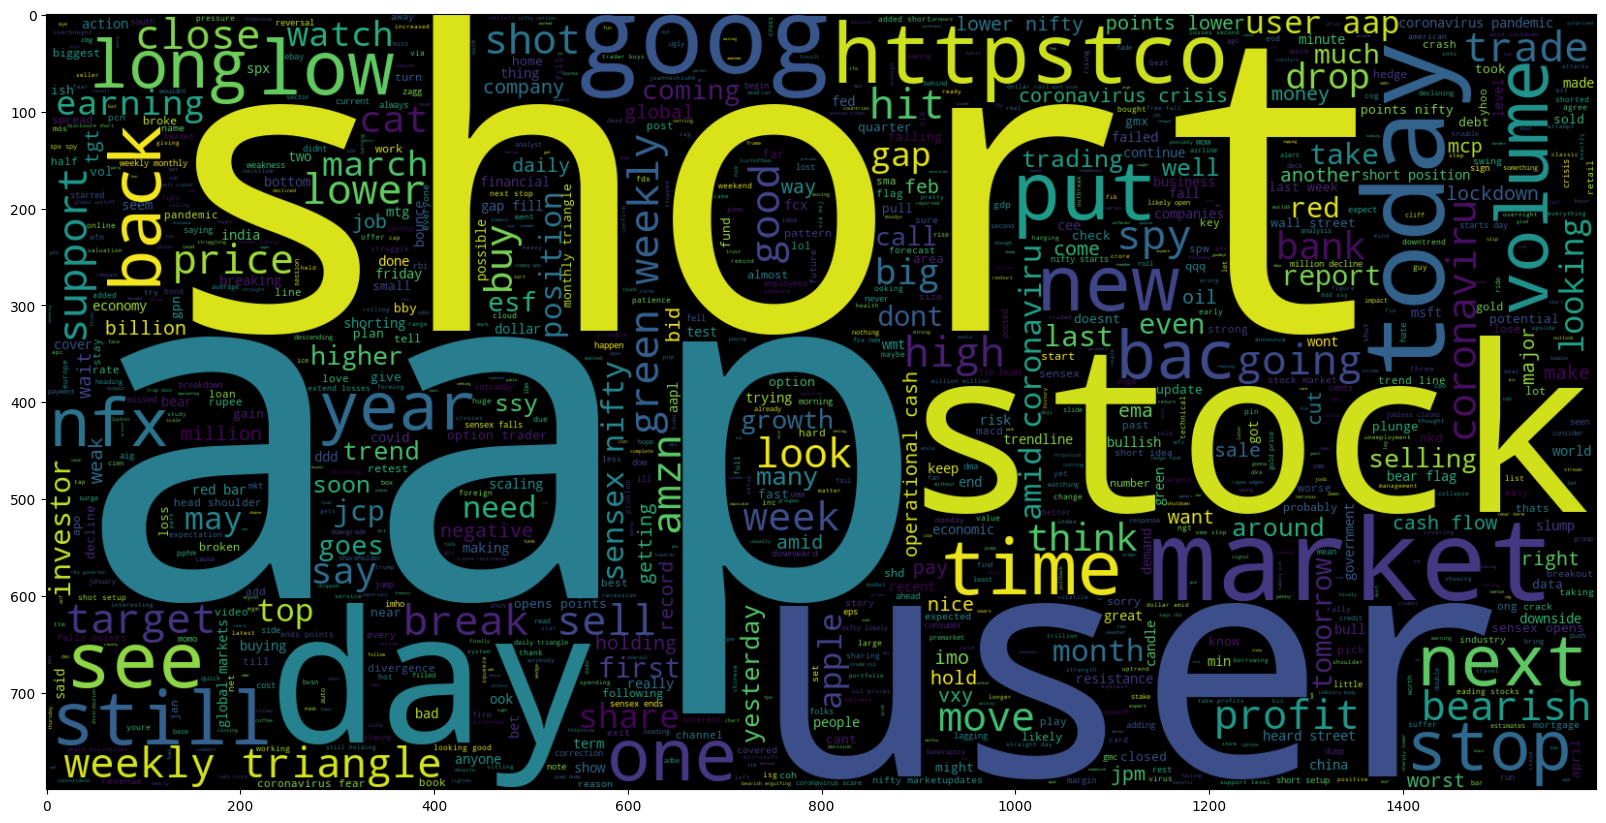

In [35]:
# Visualize the wordcloud for tweets that have negative sentiment
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000, width = 1600, height = 800 ).generate(" ".join(stock_df[stock_df['Sentiment'] == 0]['Text Without Punc & Stopwords Joined']))
plt.imshow(wc, interpolation = 'bilinear');

**Negative Sentiment Word Cloud:**

Strong repeated words are “short”, “put”, “low”, “down”, “profit”, “coronavirus”, “bearish”, “drop”. These terms indicate bearish behavior or negative market outlook.

### Visualize Cleaned Datasets:


In [36]:
stock_df.head()

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords Joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[user, aap, movie, return, feageed, indicator,...",user aap movie return feageed indicator trades...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[user, afraid, short, amzn, looking, like, nea...",user afraid short amzn looking like nearmonopo...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],


## 5. Tokenization

Tokenization is the process of splitting a given text into separate tokens. This step takes place after cleansing the raw text data. The tokens are then normalized to create the bag of words (BOW) which is a collection of distinct set of tokens from all the texts in a sample dataset.

In [41]:
import nltk
nltk.download("punkt")      
nltk.download("punkt_tab")  

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zakariyaboutayeb/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/zakariyaboutayeb/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [42]:
# word_tokenize is used to break up a string into words
print(stock_df['Text Without Punc & Stopwords Joined'][0])
print(nltk.word_tokenize(stock_df['Text Without Punc & Stopwords Joined'][0]))

kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts
['kickers', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'trade', 'method', 'method', 'see', 'prev', 'posts']


## 6. Tweet Length Distribution

In [43]:
tweets_length = [ len(nltk.word_tokenize(x)) for x in stock_df['Text Without Punc & Stopwords Joined'] ]
tweets_length

[14,
 9,
 8,
 1,
 0,
 1,
 10,
 13,
 8,
 5,
 10,
 18,
 9,
 9,
 11,
 5,
 14,
 10,
 13,
 4,
 6,
 6,
 2,
 5,
 3,
 10,
 3,
 3,
 10,
 6,
 11,
 12,
 9,
 3,
 11,
 11,
 4,
 9,
 13,
 11,
 11,
 8,
 10,
 10,
 4,
 10,
 8,
 7,
 7,
 9,
 10,
 10,
 8,
 2,
 14,
 13,
 9,
 8,
 1,
 14,
 8,
 12,
 6,
 14,
 6,
 6,
 7,
 6,
 6,
 10,
 10,
 4,
 11,
 13,
 17,
 6,
 9,
 8,
 2,
 11,
 5,
 4,
 10,
 11,
 16,
 4,
 11,
 5,
 6,
 3,
 1,
 6,
 9,
 4,
 7,
 6,
 7,
 10,
 1,
 3,
 9,
 4,
 16,
 8,
 11,
 11,
 18,
 7,
 9,
 13,
 12,
 10,
 4,
 4,
 11,
 11,
 10,
 6,
 10,
 5,
 5,
 8,
 9,
 15,
 3,
 5,
 9,
 19,
 13,
 11,
 3,
 1,
 1,
 2,
 7,
 13,
 12,
 9,
 9,
 11,
 10,
 11,
 15,
 8,
 10,
 10,
 12,
 12,
 6,
 10,
 13,
 4,
 12,
 10,
 16,
 14,
 9,
 12,
 5,
 5,
 3,
 8,
 2,
 4,
 10,
 7,
 6,
 12,
 6,
 16,
 9,
 6,
 5,
 11,
 10,
 12,
 9,
 2,
 11,
 9,
 11,
 12,
 8,
 10,
 8,
 3,
 6,
 6,
 9,
 9,
 4,
 6,
 5,
 4,
 5,
 11,
 11,
 8,
 9,
 14,
 9,
 7,
 10,
 12,
 8,
 7,
 6,
 3,
 11,
 11,
 6,
 9,
 11,
 16,
 10,
 8,
 12,
 8,
 12,
 11,
 4,
 4,
 3,
 11,
 2,
 9,
 

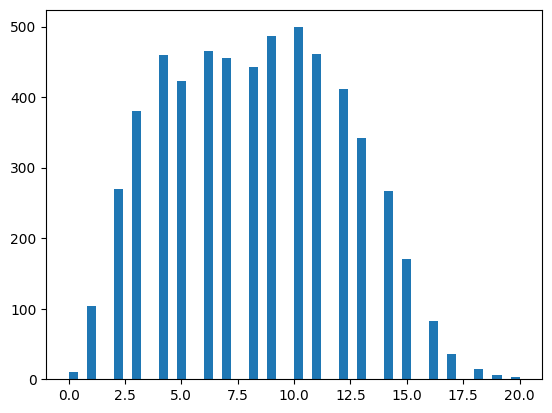

In [44]:
plt.hist(tweets_length, bins=50)
plt.show()

The distribution of the number of words that we have in the text is a **bell curve** which shows that **most of tweets range between 5 and 11 number of words** and then decay afterwards.This is useful when choosing a max sequence length for padding (e.g., 20 tokens).

## 7. Model Training:

Model training involves selecting the appropriate ML algorithm, evaluating performance of the trained model, and tuning the model accordingly. These steps are iterative because model building is an iterative process.

### Train / Test Split


In [52]:
X = stock_df['Text Without Punc & Stopwords']
y = stock_df['Sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 0
)


In [53]:
X_train.shape 

(4632,)

In [54]:
X_test.shape

(1159,)

Shapes tell us that we have 4632 training tweets and 1159 test tweets. So we can train on one part of the data and evaluate on unseen data.

In [55]:
X_train

1573                                  [breakout, updated]
5398    [doctors, nurses, coming, retirement, help, co...
2265    [omex, odysseys, ecord, breaking, ecovery, fea...
3905                            [bvsn, good, start, like]
4265    [aap, bears, turn, user, aboutto, explain, aap...
                              ...                        
4931    [nvda, confirmed, previous, analyse, broke, de...
3264    [kex, made, awesome, move, thru, made, nice, s...
1653    [aap, sinking, afterhour, get, eady, gap, tomo...
2607                       [swy, bought, longterm, calls]
2732    [ocn, small, entry, low, volume, decline, supp...
Name: Text Without Punc & Stopwords, Length: 4632, dtype: object

### Tokenizer & Sequences

Tokenizer builds a vocabulary from the training tweets (word → integer index).

texts_to_sequences converts each tweet into a list of integers, e.g.
"follow thru nkd profit well" → [278, 291, 160, 99, 59]

Now the model will work with numbers instead of strings.

In [56]:
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(X_train)

# Training data
train_sequences = tokenizer.texts_to_sequences(X_train)

# Testing data
test_sequences = tokenizer.texts_to_sequences(X_test)

In [57]:
train_sequences

[[43, 1172],
 [3355, 3356, 95, 1713, 445, 23, 154, 182, 474, 127, 3357, 3358, 3359],
 [1714, 3360, 3361, 82, 3362, 3363, 2291, 246, 3364, 3365, 635, 3366],
 [475, 9, 155, 7],
 [1, 537, 422, 2, 3367, 1173, 1, 41, 37, 99, 476, 1013],
 [1174, 636, 3368, 3369, 3370, 27, 131, 2292, 11, 34],
 [400, 581, 292, 3371, 48, 1014, 60, 31, 14],
 [53, 36, 206, 28, 2293],
 [1404, 39, 32, 24, 4, 43, 782, 446, 1715],
 [2, 538, 3372, 93, 54],
 [364, 174],
 [1405, 447, 1015, 140, 3373, 3374, 1716, 198, 10, 19, 58, 33],
 [2, 1, 1016, 3375, 11, 1016, 2294, 11, 2294, 293, 11, 141],
 [448, 42, 94],
 [207,
  247,
  20,
  3376,
  3377,
  3378,
  2295,
  875,
  423,
  160,
  1717,
  365,
  1406,
  1407,
  3,
  207],
 [128, 142, 117, 219, 3379, 3380],
 [2, 12, 64, 3381, 449, 237, 60],
 [2, 3382, 401, 1017, 16, 1175, 3383, 1018],
 [3384, 8, 19, 229, 54, 1176, 143, 693, 1177, 3385, 323],
 [3386, 13, 73, 339, 1718, 6, 183, 84, 5],
 [2, 3387, 1178, 1719, 91, 77, 248, 637],
 [43, 192],
 [1720, 1721, 1179, 2296, 249, 2

In [58]:
test_sequences

[[256, 102, 90, 66, 1637, 40, 9, 94, 192, 31, 14, 228],
 [1291, 13, 73, 173, 79, 66],
 [23, 121, 27, 1056, 810, 1269, 2545, 1708, 520],
 [627],
 [385, 502],
 [419, 70, 133, 3, 686, 189],
 [472, 46, 43, 2181, 24, 1435, 390, 8, 685],
 [448],
 [1161, 3, 322, 698],
 [168, 163, 2920, 37, 90, 66, 1321],
 [845, 40, 772, 121, 1494, 690],
 [269, 23, 722, 294, 260],
 [257, 73, 125, 65, 1, 7415, 2, 7556, 7, 44, 1333],
 [1397, 3092, 16, 47, 9],
 [15, 164, 413, 189],
 [2, 1, 646, 7, 2891, 464, 130, 153, 845, 11, 56, 247, 123, 186, 414],
 [15, 21, 245, 80, 119, 275, 158],
 [74, 137, 463, 52, 899, 639, 52, 3, 126],
 [49, 142, 216, 565, 57, 1953, 618, 1924, 34],
 [2, 984, 6, 886, 22, 41, 402, 387, 8, 4, 100],
 [1105, 466, 6785, 3562, 955],
 [2376, 548, 96, 67, 23, 154, 881, 269],
 [2, 1, 858, 16, 1329, 6859, 150, 2136, 2210, 25, 318, 181, 253, 489],
 [1494, 614, 388, 1609, 64, 3008, 5706, 1051],
 [1448, 142, 1399, 242, 417, 137, 193, 5],
 [612, 1664, 4691, 620, 195],
 [2, 1, 392, 8, 338, 418, 581, 161

In [59]:
print("The encoding for document\n", X_train[1:2],"\n is: ", train_sequences[1])

The encoding for document
 5398    [doctors, nurses, coming, retirement, help, co...
Name: Text Without Punc & Stopwords, dtype: object 
 is:  [3355, 3356, 95, 1713, 445, 23, 154, 182, 474, 127, 3357, 3358, 3359]


### Padding Sequences

In [60]:
padded_train = pad_sequences(train_sequences, maxlen = 15, padding = 'post')
padded_test  = pad_sequences(test_sequences,  maxlen = 15, truncating = 'post')

Tweets have different lengths, but neural nets expect fixed-size inputs. So, we choose maxlen = 15 (up to 15 tokens per tweet).

pad_sequences:

•	If a tweet is shorter than 15 we add zeros at the end (padding='post').

•	If it’s longer than 15 we cut off extra tokens at the end (truncating='post').

In [61]:
for i, doc in enumerate(padded_train[:3]):
     print("The padded encoding for document:", i+1," is:", doc)

The padded encoding for document: 1  is: [  43 1172    0    0    0    0    0    0    0    0    0    0    0    0
    0]
The padded encoding for document: 2  is: [3355 3356   95 1713  445   23  154  182  474  127 3357 3358 3359    0
    0]
The padded encoding for document: 3  is: [1714 3360 3361   82 3362 3363 2291  246 3364 3365  635 3366    0    0
    0]


So after padding:

- Document 1 has only 2 tokens, so it gets 13 zeros. 43  corresponds to  token for word1  while 1172 to token for word2 and everything else is padding zeros.

- Document 2 has 13 tokens, so it gets 2 zeros at the end.

- Document 3 has 12 tokens, so it gets 3 zeros.

Each tweet is converted into a list of numbers (word IDs). All sequences are padded/truncated to 15 tokens. 0 = padding, not a real word. Higher numbers like 3355 = rare words in vocabulary. Everything looks correct and ready for model training.

Each row is now a 15-dimensional integer sequence ready for the embedding/LSTM layer.

### One-Hot Encode the Labels

Converts labels 0 and 1 into 2-dim arrays:

•	0 → [1., 0.]

•	1 → [0., 1.]

This is needed because your model uses softmax with 2 outputs and categorical_crossentropy.

In [62]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, 2)
y_test_cat  = to_categorical(y_test, 2)


In [63]:
y_train_cat.shape 

(4632, 2)

In [64]:
y_test_cat.shape

(1159, 2)

In [65]:
y_train_cat

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

Now the labels match a 2-unit softmax output in your LSTM model, and you can train with loss='categorical_crossentropy'.

### LSTM model architecture

Build a Custom-Based Deep Neural Network (LSTM Network) to perform Sentiment Analysis

In [67]:
# Sequential Model
model = Sequential()

# Embedding layer
model.add(Embedding(total_words, output_dim=512))

# LSTM layer
model.add(LSTM(256))

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

2025-12-09 23:32:20.773027: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2025-12-09 23:32:20.773162: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2025-12-09 23:32:20.773180: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 12.48 GB
2025-12-09 23:32:20.773255: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-12-09 23:32:20.773288: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 512)         4748800   
                                                                 
 lstm (LSTM)                 (None, 256)               787456    
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 5569410 (21.25 MB)
Trainable params: 5569410 (21.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Layer by layer:

1.	Embedding(total_words, 512): 
- Learns a dense 512-dimensional vector representation for each word index.
- Input: padded sequences of word indices.
- Output: sequence of embeddings (15 × 512 per tweet).

2.	LSTM(256)
- Processes the sequence of embeddings.
- Captures order and context in the tweet.
- Outputs a 256-dimensional vector summarizing the tweet.
    
3.	Dense(128, relu): Fully connected layer for non-linear transformation.
    
4.	Dropout(0.3): Randomly drops 30% of units during training to reduce overfitting.

5.	Dense(2, softmax): Final layer with 2 outputs (probability of negative vs positive).

Compiled with:
- Optimizer: adam
- Loss: categorical_crossentropy
- Metric: accuracy

Total parameters is around 5.5M (dominated by the embedding matrix).


### Training

In [68]:
# train the model
model.fit(padded_train, y_train_cat,
          batch_size=32,
          validation_split=0.2)

2025-12-09 23:33:38.218494: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-12-09 23:33:38.260970: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp_10.


116/116 [==============================] - 6s 26ms/step - loss: 0.5959 - accuracy: 0.6872 - val_loss: 0.5179 - val_accuracy: 0.7497


So the model is already learning and generalizing reasonably.

### Predictions on Test Set

In order to validate a ML model, we must measure its training performance. We will next consider several techniques to measure model performance or goodness of fit of a ML algorithm that are well suited specifically for binary classification models.

Model performance can be evaluated by using error analysis. For a classification model, a confusion matrix for error analysis (TPs, TNs, FPs and FNs are determined) is created, and evaluation metrics such as Precision, Recall, Accuracy score and F1 score are claculated. The higher the accuracy and F1 score, the better the model performance.

In [69]:
# make prediction
pred = model.predict(padded_test)   # shape: (1159, 2)

37/37 [==============================] - 1s 9ms/step


In [70]:
pred

array([[0.04385032, 0.9561497 ],
       [0.15972185, 0.8402782 ],
       [0.67559624, 0.32440376],
       ...,
       [0.13530436, 0.86469567],
       [0.15108538, 0.8489147 ],
       [0.40436792, 0.59563214]], dtype=float32)

For each tweet, you get two probabilities: [p(negative), p(positive)].

Then we convert probabilities to class labels:

In [71]:
prediction = []
for i in pred:
    prediction.append(np.argmax(i))

In [72]:
prediction

[1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


np.argmax picks the index with highest probability (0 or 1).

You do the same for the ground truth:

In [73]:
original = []
for i in y_test_cat:
    original.append(np.argmax(i))

In [74]:
original

[1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,


Now both prediction and original are 1D lists of 0s and 1s.

## 8. Evaluation: accuracy & confusion matrix

In [77]:
# acuracy score on text data
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, prediction)
accuracy

0.7791199309749784

LSTM sentiment model correctly classifies around 77.9% of all tweets in the test set.

This is a solid performance for a simple LSTM trained on short, noisy financial tweets.

<Axes: >

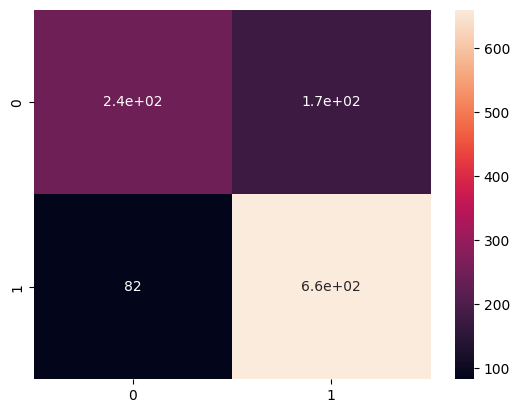

In [78]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(original, prediction)
sns.heatmap(cm, annot=True)

**Summary:** 

- we have cleaned and preprocessed tweets (removed punctuation, stopwords).

- We have converted text to numbers via tokenization, then padded sequences to fixed length.

- We have trained an LSTM-based neural network with an embedding layer to learn sentiment features from text.

- On the held-out test set, the model achieves around 78% accuracy, and the confusion matrix shows how many positive/negative tweets are correctly or incorrectly classified.

- The LSTM Model correctly recognized 240 negative tweets while it correctly identified 660 positive tweets which is a strong performance on positive sentiment. 

- The dataset has more positive tweets than negative ones, and the model learned this pattern. So it tends to predict positive more often, causing higher False Positives and lower False Negatives. This imbalance is normal in financial sentiment datasets where optimism & buy signals dominate.


